In [ ]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact
import unidecode
import pandas as pd
import random
import json
from collections import Counter
from itertools import chain
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re
#https://pypi.org/project/tqdm/ information on tqdm
from tqdm import tqdm
tqdm.pandas()

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px

# Data Modeling
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import FastText, Word2Vec
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn import model_selection
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Recipes_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124473 entries, 0 to 124472
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   title              124473 non-null  object
 1   ingredients        124473 non-null  object
 2   instructions       124450 non-null  object
 3   ingredients_query  122951 non-null  object
 4   cuisine            124473 non-null  object
dtypes: object(5)
memory usage: 4.7+ MB


In [ ]:
df.head()

,title,ingredients,instructions,ingredients_query,cuisine
0,Slow Cooker Chicken and Dumplings,"['4 skinless, boneless chicken breast halves A...","Place the chicken, butter, soup, and onion in ...",skinless boneless chicken breast half butter ...,southern_us
1,Awesome Slow Cooker Pot Roast,['2 (10.75 ounce) cans condensed cream of mush...,"In a slow cooker, mix cream of mushroom soup, ...",can condensed cream mushroom soup package dry...,italian
2,Brown Sugar Meatloaf,"['1/2 cup packed brown sugar ADVERTISEMENT', '...",Preheat oven to 350 degrees F (175 degrees C)....,cup packed brown sugar cup ketchup lean groun...,southern_us
3,Best Chocolate Chip Cookies,"['1 cup butter, softened ADVERTISEMENT', '1 cu...",Preheat oven to 350 degrees F (175 degrees C)....,cup butter softened cup white sugar cup packe...,southern_us
4,Homemade Mac and Cheese Casserole,['8 ounces whole wheat rotini pasta ADVERTISEM...,Preheat oven to 350 degrees F. Line a 2-quart ...,whole wheat rotini pasta fresh broccoli flore...,italian


In [ ]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [ ]:
df['cuisine'].unique()

array(['southern_us', 'italian', 'british', 'french', 'thai', 'irish',
       'filipino', 'mexican', 'russian', 'japanese', 'cajun_creole',
       'chinese', 'indian', 'jamaican', 'greek', 'spanish', 'brazilian',
       'korean', 'vietnamese', 'moroccan'], dtype=object)

<Axes: >

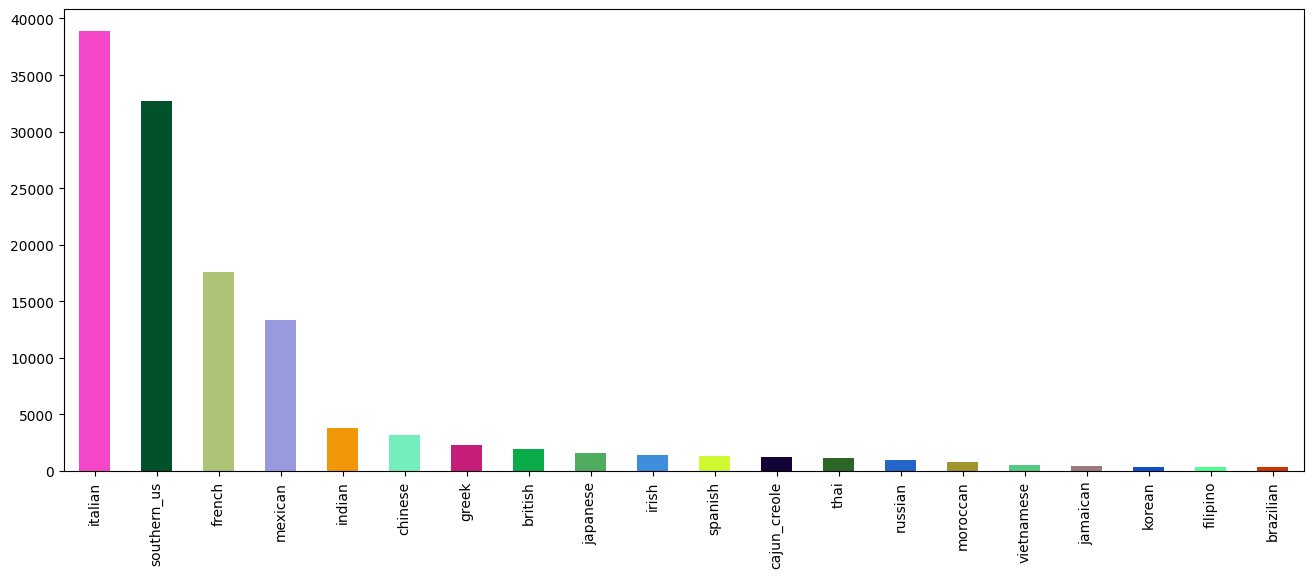

In [ ]:
df['cuisine'].value_counts().plot.bar(color=random_colours(20),figsize=(16,6))

In [ ]:
raw_ingredients = [ing for ingredients in df['ingredients'] for ing in ingredients]

In [ ]:
print('Maximum Number of Ingredients in a Dish: ',df['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  3426
Minimum Number of Ingredients in a Dish:  2


In [ ]:
df['num_ing'] = df['ingredients'].str.len()

<Axes: xlabel='num_ing'>

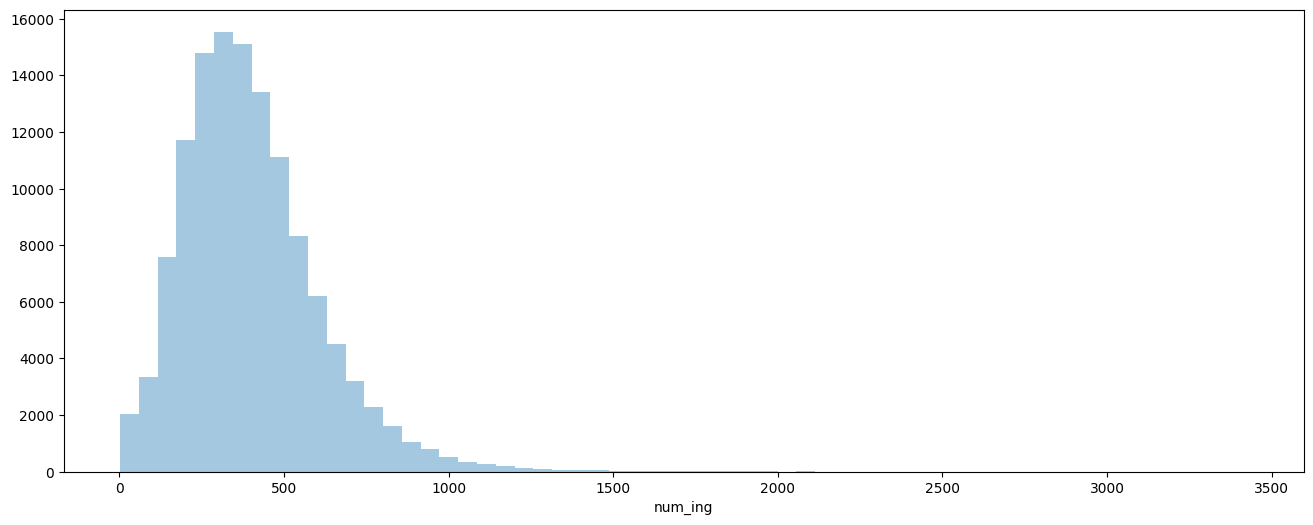

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df['num_ing'],kde =False ,bins=60)

In [ ]:
longrecip = df[df['num_ing'] > 30]
print(len(longrecip))

122856


In [ ]:
longrecip['cuisine'].value_counts()

italian         37330
southern_us     32652
french          17593
mexican         13329
indian           3802
chinese          3163
greek            2330
british          1904
japanese         1616
irish            1407
spanish          1350
cajun_creole     1259
thai             1149
russian           990
moroccan          813
vietnamese        537
jamaican          485
korean            400
filipino          397
brazilian         350
Name: cuisine, dtype: int64

In [ ]:
shortrecip = df[df['num_ing']<=2]
print(len(shortrecip))

1520


In [ ]:
shortrecip['cuisine'].value_counts()

italian    1520
Name: cuisine, dtype: int64

In [ ]:
' '.join(sorted([char for char in set(' '.join(raw_ingredients)) if re.findall('[^A-Za-z]', char)]))

'  ! " # $ % & \' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \\ ] _ ` { | } ~ ¤ § © ® ° ¼ ½ ¾ ¿ À É × Ú Ü à á â ä å ç è é ê ë ì í î ï ñ ó ô õ ù ú û ü ź ́ ‐ ‑ – — ’ ‚ ” ‟ • ‧ ‱ ″ ⁄ ™ ⅛ ⅞ ﬁ ﬂ �'

In [ ]:
list(set([ingredient for ingredient in raw_ingredients if re.findall('[A-Z]+', ingredient)]))[:5]

['W', 'K', 'U', 'P', 'H']

In [ ]:
list(set([ingredient for ingredient in raw_ingredients if '’' in ingredient]))

['’']

In [ ]:
list(set([ingredient for ingredient in raw_ingredients if re.findall('-', ingredient)]))[:5]

['-']

In [ ]:
temp_ing = list(set([ingredient for ingredient in raw_ingredients if re.findall('[0-9]', ingredient)]))
temp_ing[:6]

['4', '6', '5', '0', '8', '3']

In [ ]:
import re

# Define the keyword to remove
keyword_to_remove = 'ADVERTISEMENT'

# Function to remove special characters, percentages, and associated numbers
def remove_special_characters_and_percentages(text):
    # Use a regular expression to remove non-alphanumeric characters, percentages, and associated numbers
    return re.sub(r'[^a-zA-Z\s]|(\d+\s*%)', '', str(text))

# Iterate through each column and row to remove the specified keyword, special characters, percentages, and associated numbers
for column in df.columns:
    df[column] = df[column].apply(lambda x: str(x).replace(keyword_to_remove, '') if isinstance(x, (str, float)) else x)
    df[column] = df[column].apply(remove_special_characters_and_percentages)

# Save the cleaned DataFrame to a new CSV file
df.to_csv('Cleaned_Recipe_Data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Cleaned_Recipe_Data.csv')
df.head(5)

,title,ingredients,instructions,ingredients_query,cuisine,num_ing
0,Slow Cooker Chicken and Dumplings,skinless boneless chicken breast halves tab...,Place the chicken butter soup and onion in a s...,skinless boneless chicken breast half butter ...,southernus,NaN
1,Awesome Slow Cooker Pot Roast,ounce cans condensed cream of mushroom soup ...,In a slow cooker mix cream of mushroom soup dr...,can condensed cream mushroom soup package dry...,italian,NaN
2,Brown Sugar Meatloaf,cup packed brown sugar cup ketchup pound...,Preheat oven to degrees F degrees C Lightly ...,cup packed brown sugar cup ketchup lean groun...,southernus,NaN
3,Best Chocolate Chip Cookies,cup butter softened cup white sugar cup p...,Preheat oven to degrees F degrees C\nCream t...,cup butter softened cup white sugar cup packe...,southernus,NaN
4,Homemade Mac and Cheese Casserole,ounces whole wheat rotini pasta cups fresh ...,Preheat oven to degrees F Line a quart casser...,whole wheat rotini pasta fresh broccoli flore...,italian,NaN


In [ ]:
!pip install roman

In [ ]:
import re
from roman import fromRoman
def remove_special_characters_and_percentages(text):
    # Remove Roman numerals
    cleaned_text = re.sub(r'\b[IVXLCDM]+\b', '', str(text))
    return cleaned_text


# Function to remove Roman numerals represented as numbers
def remove_roman_numbers(text):
    return re.sub(r'\b\d+\b', lambda x: str(fromRoman(x.group())) if int(x.group()) <= 3999 else x.group(), str(text))


# Iterate through each column and row to remove the specified keyword, special characters, percentages, and associated numbers
for column in df.columns:
    df[column] = df[column].apply(remove_special_characters_and_percentages)
    df[column] = df[column].apply(remove_roman_numbers)



# Drop the specified columns 'num_ing' and 'ingredients_query'
columns_to_drop = ['num_ing', 'ingredients_query']
df = df.drop(columns=columns_to_drop, errors='ignore')



# Save the cleaned DataFrame to a new CSV file
df.to_csv('Updated_Recipe_Data.csv', index=False)
